# Final Project

In [1]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

### 獲取歷史資料

In [2]:
from finlab.data import Data
#from finlab.ml import fundamental_features
#fdf = fundamental_features()

data = Data()

close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

PB = data.get("股價淨值比")
pe = data.get("本益比")

#bi = data.get("營業利益")


#close = data.get_adj("收盤價").round(2)

#財務指標
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

#t123 = data.get('土地')

bargin_i=data.get("投信買賣超股數")/data.get("成交股數")
bargin_f=data.get("外資自營商買賣超股數")/data.get("成交股數")
bargin_s=data.get("自營商買賣超股數(自行買賣)")/data.get("成交股數")
#

vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

rev.index = rev.index.shift(5, "d")         #每月頻率
#周頻率

### 計算features

In [3]:
#MFI  = data.talib("MFI")
##MFI.tail()
#ub,mb,lb =data.talib("BBANDS")

#### 營收相關

In [4]:
##############################################　　　自己加入的　　　##############################################
import pandas as pd
from finlab.__init__ import talib_all_stock
from talib import abstract

In [5]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min() 
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1

def bi(n):
    return bargin_i/bargin_i.rolling(n).mean()

def bf(n):
    return bargin_f/bargin_f.rolling(n).mean()
    
def bs(n):
    return bargin_s/bargin_s.rolling(n).mean()

#-------------------------------------------

features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),

    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
###############################################
    'yoy': yoy(1),
    'delta_yoy':yoy(1)-yoy(2),
    
    'PB':PB,
    'PE':pe,  
    
   #'bi5' : bi(5),
   #'bi10' : bi(10),
   #'bi20' : bi(20),
   #'bi60' : bi(60),
   # 
   #'bf5' : bf(5),
   # #'bf10' : bf(10),
   # #'bf20' : bf(20),
   # #'bf60' : bf(60),
   # 
   # 'bs5' : bs(5),
   # 'bs10' : bs(10),
   # 'bs20' : bs(20),
   # 'bs60' : bs(60),
    
}


In [6]:
#bi(60).dropna(how='all')

#### 財報指標

兩個feature結合[[連結網址]](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)

---
```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

In [7]:
from finlab.ml import fundamental_features
dataset_fundamental = fundamental_features()

In [8]:
#dataset_fundamental

#### 技術指標

加入其他features
* http://finlabcourse.imotor.com/viewthread.php?tid=660&extra=page%3D1

```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

#### 組合dataset

In [9]:
import pandas as pd

#### 確認各指標清單

In [10]:
#t1 = data.talib("NATR",timeperiod=14)
#t1.to_csv('myfile.csv')

### 製作dataset

##### 設定買賣頻率

In [11]:
#rev.index = rev.index.tz_localize("Asia/Taipei")
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-05-15', '2022-06-15', '2022-07-15', '2022-08-15',
               '2022-09-15', '2022-10-15', '2022-11-15', '2022-12-15',
               '2023-01-15', '2023-02-15'],
              dtype='datetime64[ns]', name='date', length=217, freq=None)

#### 將dataframe 組裝起來

In [12]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [13]:
for name, f in features.items():
    features[name] = f.unstack()

In [14]:
import pandas as pd
dataset = pd.DataFrame(features)

In [15]:
feature_names = list(dataset.columns)

In [16]:
from finlab import ml
ml.add_feature(dataset, 'vol_ma5', vol_ma5)

dataset

mom1      mom2      mom3      mom4      mom5  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2022-10-15  1.280940  0.641536  1.694666  0.917472  0.678559   
         2022-11-15  0.830797  1.280940  0.641536  1.694666  0.917472   
         2022-12-15  1.163303  0.830797  1.280940  0.641536  1.694666   
         2023-01-15  1.004024  1.163303  0.830797  1.280940  0.641536   
         2023-02-15  1.249495  1.004024  1.163303  0.830797  1.280940   

                         mom6      mom7      mom8      mom9     bias5  ...  \
stock_id date                                                          ...   
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-03-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-04-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-05-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-06-15       NaN       NaN       NaN       NaN       NaN  ...   
...                       ...       ...       ...       ...       ...  ...   
9962     2022-10-15  1.435387  1.209077  0.859901  0.729493  0.956989  ...   
         2022-11-15  0.678559  1.435387  1.209077  0.859901  1.024242  ...   
         2022-12-15  0.917472  0.678559  1.435387  1.209077  1.024939  ...   
         2023-01-15  1.694666  0.917472  0.678559  1.435387  1.004331  ...   
         2023-02-15  0.641536  1.694666  0.917472  0.678559  1.005587  ...   

                        rsv10     rsv20     rsv60    rsv120    rsv240  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2022-10-15  0.187500  0.142857  0.130435  0.198582  0.124444   
         2022-11-15  1.000000  1.000000  1.000000  0.933962  0.440000   
         2022-12-15  1.000000  1.000000  0.987500  0.989899  0.435556   
         2023-01-15  0.852941  0.895833  0.943820  0.957627  0.586667   
         2023-02-15  1.000000  1.000000  1.000000  1.000000  0.697778   

                          yoy  delta_yoy    PB    PE    vol_ma5  
stock_id date                                                    
0015     2005-02-15       NaN        NaN   NaN   NaN        NaN  
         2005-03-15       NaN        NaN   NaN   NaN        NaN  
         2005-04-15       NaN        NaN   NaN   NaN        NaN  
         2005-05-15       NaN        NaN   NaN   NaN        NaN  
         2005-06-15       NaN        NaN   NaN   NaN        NaN  
...                       ...        ...   ...   ...        ...  
9962     2022-10-15  0.725788   0.439333  1.10  6.12   638.6044  
         2022-11-15  0.003516  -0.722271  1.33  7.01   462.1834  
         2022-12-15  0.129923   0.126406  1.32  6.99   632.1574  
         2023-01-15 -0.084119  -0.214041  1.46  7.70  3007.9848  
         2023-02-15  0.568746   0.652864  1.55  8.22   932.8926  

[445067 rows x 32 columns]

In [17]:
##############################################　　　自己加入的　　　##############################################
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])


#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

In [18]:
#list(dataset_fundamental.columns)

In [19]:
#dataset_fundamental.reindex(dataset.index).dropna()

data[組合](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)
```python
new_df = pd.concat([dataset_fundamental['R402_營業毛利成長率'],dataset],axis=1).dropna(how='any')
```

In [20]:
#new_df = pd.concat([dataset_fundamental,dataset],axis=1).dropna(how='all').fillna(method='ffill')

In [21]:
#dataset = new_df

In [22]:
#new_df = pd.concat([dataset_fundamental,dataset],axis=1).dropna(how='any')
#dataset1 = new_df.fillna(method='ffill')#[(new_df.index.get_level_values('stock_id')=='2330')]
##dataset = dataset1

In [23]:
#feature_names=list(dataset1.columns)
#feature_names

### 新增 label(績效/排名)
 - 定義一下要比績效還是要比排名

In [24]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

In [25]:
#profit(return) rank
predi_target = 'rank'

### 刪除太大太小的歷史資料

In [26]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset , feature_names , thresh=0.01)

print(dataset_drop_extreme_case.shape)

##(436988, 34)
##(377968, 34)

(445067, 34)
(385109, 34)


In [27]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [28]:
#dataset_drop_extreme_case.index.get_level_values("date")

In [29]:
##################################################################################################################
##############################################　　　自己加入的　　　##############################################
##################################################################################################################

dataset_dropna.index = pd.to_datetime(dataset_dropna.index)
dataset_dropna = dataset_dropna.sort_index()

#修復＜class ‘numpy.ndarray‘＞　https://blog.csdn.net/lxbin/article/details/114005757

## Split Train Test dataset

In [30]:
dataset_train = dataset_dropna.loc[:'2021-12']
dataset_test = dataset_dropna.loc['2022-01':]

#date_arr = dataset.index.get_level_values('date') < '2020'
#dataset_train = dataset[date_arr]
#dataset_test = dataset[~date_arr]

In [31]:
train = dataset_train[feature_names] , dataset_train['return'] > 1
test = dataset_test[feature_names] , dataset_test['return'] > 1 

### 機器學習
 - 目前只有三個，技術指標也要再增加一下feature_names

In [32]:
#feature_names = feature_names1

In [33]:
dataset_train.index

DatetimeIndex(['2010-01-15', '2010-01-15', '2010-01-15', '2010-01-15',
               '2010-01-15', '2010-01-15', '2010-01-15', '2010-01-15',
               '2010-01-15', '2010-01-15',
               ...
               '2021-12-15', '2021-12-15', '2021-12-15', '2021-12-15',
               '2021-12-15', '2021-12-15', '2021-12-15', '2021-12-15',
               '2021-12-15', '2021-12-15'],
              dtype='datetime64[ns]', name='date', length=125346, freq=None)

#### kerascolumns

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import os


os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train[predi_target],
                    batch_size=1000,         #1000  #每一个batch的大小
                    epochs=225, #225          #迭代次数
                    verbose=1,
                    validation_split=0.1,
                    #validation_data =        #(测试集的输入特征，测试集的标签），
                    #validation_split =       # 从测试集中划分多少比例给训练集，
                    #validation_freq = 20        #测试的epoch间隔数                     
                   )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13,401
Trainable params: 13,401
Non-trainable params: 0
_________________________________________________________________
start fitting
Epoch 1/225
113/113 [==============================] - 1s 6ms/step - loss: 0.1199 - val_loss: 0.0722
Epoch 2/225
113/113 [==============================] - 0s 4ms/step - 

##### 結果

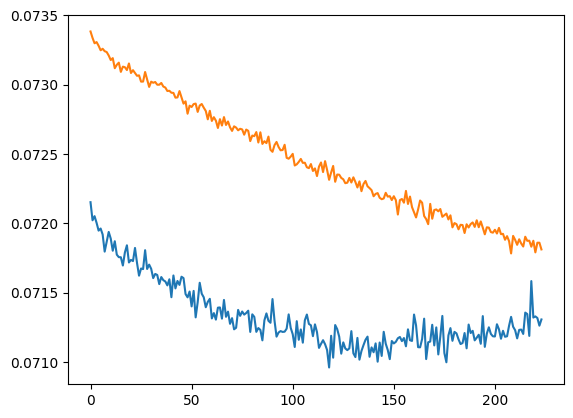

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

#### lightgbm Model

In [36]:
##############################################　　　自己加入的　　　##############################################
import lightgbm as lgb

cf = lgb.LGBMRegressor(n_estimators=5000)

print('---cf.fit---')
print(cf.fit(*train))
print('---cf.score---')
print(cf.score(*test))
print('---predict---')
print(cf.predict(test[0]))

---cf.fit---
LGBMRegressor(n_estimators=5000)
---cf.score---
-0.06438180699831064
---predict---
[0.35560677 0.17691409 0.32886886 ... 0.81932181 0.68134105 0.39936733]


##### 參數優化_1110

In [37]:
#import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [38]:
gs.fit(*train, **fit_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[100]	valid's auc: 0.562897
[100]	valid's auc: 0.555166
[100]	valid's auc: 0.537033
[100]	valid's auc: 0.561275
[100]	valid's auc: 0.56177
[100]	valid's auc: 0.536581
[100]	valid's auc: 0.561547
[100]	valid's auc: 0.558888
[100]	valid's auc: 0.547386
[100]	valid's auc: 0.549452
[100]	valid's auc: 0.533764
[100]	valid's auc: 0.550194
[100]	valid's auc: 0.545077
[100]	valid's auc: 0.563851
[100]	valid's auc: 0.557135
[100]	valid's auc: 0.536781
[100]	valid's auc: 0.551252
[100]	valid's auc: 0.552159
[100]	valid's auc: 0.539849
[100]	valid's auc: 0.555085
[100]	valid's auc: 0.545902
[200]	valid's auc: 0.553341
[100]	valid's auc: 0.550243
[100]	valid's auc: 0.555801
[100]	valid's auc: 0.535154
[100]	valid's auc: 0.553098
[200]	valid's auc: 0.561165
[100]	valid's auc: 0.552298
[100]	valid's auc: 0.535921
[100]	valid's auc: 0.555699
[100]	valid's auc: 0.548503
[200]	valid's auc: 0.552364
[100]	valid's auc: 0.529433
[100]	valid's 

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='None', n_estimators=5000,
                                            n_jobs=4, random_state=314,
                                            silent=True),
                   n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022D95E45420>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022D95E46...
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022D95E45D20>,
   

In [ ]:
gs.best_estimator_

In [40]:
#
#gs.best_estimator_
#LGBMClassifier(colsample_bytree=0.6433117836032942, metric='None',
#               min_child_samples=224, min_child_weight=1e-05, n_estimators=5000,
#               n_jobs=4, num_leaves=20, random_state=314, reg_alpha=10,
#               reg_lambda=10, subsample=0.8945613420997809)

In [41]:
cf = lgb.LGBMRegressor(colsample_bytree=0.9814699062881641, metric='None',
               min_child_samples=409, min_child_weight=100.0, n_estimators=5000,
               n_jobs=4, num_leaves=42, random_state=314, reg_alpha=50,
               reg_lambda=50, silent=True, subsample=0.9731705626566958)

cf.fit(dataset_train[feature_names],dataset_train['return'] > 1, **fit_params)
cf.score(dataset_test[feature_names],dataset_test['return'] > 1)

0.000649473656208599

In [42]:
cf.feature_importances_

array([6, 4, 4, 4, 4, 1, 4, 1, 3, 4, 0, 3, 5, 3, 0, 2, 5, 2, 3, 1, 3, 2,
       0, 5, 1, 0, 2, 0, 0, 4, 6])

<AxesSubplot: xlabel='Value', ylabel='Feature'>

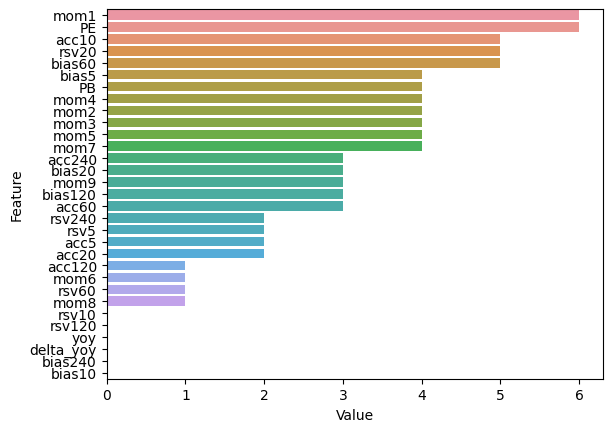

In [43]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [44]:
#print(cf.fit(*train))

In [45]:
#import lightgbm as lgb
#gbm = lgb.LGBMClassifier(n_estimators=100, random_state=5, learning_rate=0.01)
#gbm.fit(dataset_train[feature_names], dataset_train['return'] > 1)

In [46]:
#import tqdm
#
#n = 3
#
#X = []
#y = []
#indexes = []
#dataset_scaled_x = dataset_scaled[feature_names]
#
#for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-n)):
#    X.append(dataset_scaled_x.iloc[i:i+n].values)
#    y.append(dataset_scaled['return'].iloc[i+n-1])
#    indexes.append(dataset_scaled.index[i+n-1])
##dataset_scaled.head()

In [47]:
#import numpy as np
#X = np.array(X)
#y = np.array(y)

In [48]:
##import lightgbm as lgb
#cf = lgb.LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
#               min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
#               n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
#               reg_lambda=10, subsample=0.4643892520208455)
#    
#cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

#### Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train[predi_target])  

RandomForestRegressor()

##### 參數優化_1110

In [50]:
from scipy.stats import randint as sp_randint 
from sklearn.model_selection import RandomizedSearchCV 
# build a classifier 
clf = RandomForestRegressor(n_estimators=100) 
# specify parameters and distributions to sample from 
param_dist = {"max_depth": [3, None], 
              "max_features": sp_randint(1, 11), 
              "min_samples_split": sp_randint(2, 11), 
              "min_samples_leaf": sp_randint(1, 11), 
              "bootstrap": [True, False], 
              "criterion": ["mse", "mae"]} 
# run randomized search 
n_iter_search = 20 
rs = RandomizedSearchCV(clf, param_distributions=param_dist, 
                                   n_iter=n_iter_search) 

In [ ]:
rs.fit(dataset_train[features], dataset_train['return'] > 1)

##### Split Train Test dataset

In [ ]:
feature_imp = pd.DataFrame(zip(cf2.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [ ]:
select = dataset.index.get_level_values('date') < '2021-12'
dataset_train = dataset[select]
dataset_test = dataset[~select]

### Ensemble learning

In [ ]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

## backtest

## 把量加進來做篩選
 * https://hahow.in/courses/5b9d3a6dca498a001e917383/shapeussions/60c96f5b018697e8a6131cbc

In [ ]:
#把量加進來
vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

vol_filter=vol_ma5>1000
vol_filter=vol_filter[vol_filter].fillna(0)
#vol_filter
t1 = vol_filter

In [ ]:
#t1

In [ ]:
vol_filter = t1.reindex(every_month, method='ffill')#.loc['2010-02-15']
#vol_filter.loc['2010-02-15']

In [ ]:
#t1 = vol_ma5.iloc[-1].dropna()
#t1.to_csv('./tmp/132.csv')
#t1.hist(bins=10)

In [ ]:
vol = 100

In [ ]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    #print(d)
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time , feature_names , thresh=0.01)
    
    #print(dataset_time)
    
    predi_target = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
            ###
    predi_target = predi_target * (dataset_time['vol_ma5'] >vol).astype(float)
            ###

    condition = (predi_target >= predi_target.nlargest(20).iloc[-1]) 
    
    #print(vol_filter.loc[d])
    #print(condition)
    
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates)['2022-01':].cumprod()

s0050 = close['0050']['2022-01':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



In [ ]:
#import pickle
#
#return_history_1026 = pd.Series(rs, index=dates)['2021':].cumprod()
##eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()
#
#pickle.dump(rs, open('return_history_1026.pkl', 'wb'))

In [ ]:
#import pyfolio as pf
#import pandas as pd
#
#close.index = close.index.tz_localize("Asia/Taipei")
##pf.create_returns_tear_sheet(close['0050'].pct_change())
#
## 得到 上一個單元的 回測結果
#ret = pickle.load(open("return_history_1026.pkl", "rb"))
#
## 將回測報酬率取出來
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
#
## 利用pyfolio 比較報酬率
#pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

### 當月持股狀況

In [ ]:
# get the latest dataset
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, feature_names , thresh=0.01)
t1 = last_dataset

# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)


# calculate score

predi_target = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']

#
##predi_target = predi_target * vol_filter.iloc[-1] #******加上量的濾網
predi_target = predi_target * (last_dataset['vol_ma5'] >vol).astype(float)



condition = (predi_target >= predi_target.nlargest(20).iloc[-1])
#vol_filter

# plot rank distribution
predi_target[predi_target!=0].hist(bins=20)


# show the best 20 stocks
slist1 = predi_target[condition].reset_index()['stock_id']

#https://keras-cn.readthedocs.io/en/latest/models/model/

In [ ]:
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()

In [ ]:
#rank.sort_values(ascending=False).head(20)

## 平均分配資產於股票之中

In [ ]:
close = data.get("收盤價")

money = 60000
stock_prices = close[slist1].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


---
[移動窗格最佳化](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/61b4c90147843d0006cf2593)
***************

## import lightgbm as lgb

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

def select(df):

    rank = df['pre']

    condition1 = (rank >= rank.nlargest(1).iloc[-1])

    return df['return'][condition1].mean() * (1-3/1000-1.425/1000*2*0.6)

end = 5

cf = lgb.LGBMRegressor(n_estimators=500)



train_time = ['2015','2016','2017','2018','2019']

s_time = ['2007','2008','2009','2010','2011']

test_time = ['2016','2017','2018','2019','2020']

#dataset_copy = dataset_dropna.copy()

store_mse = []


for time in range(end):

    print('%d 次執行中'%(time))

    dataset_dropna2_train = dataset_copy.loc[s_time[time]:train_time[time]] #2007~ 2015   2008~2016   2009~2017  2010~2018  ....

    dataset_dropna2_test = dataset_copy.loc[test_time[time]:test_time[time]]#            2016                2017               2018              2019  .....

    
 cf.fit(dataset_dropna2_train[feature_names].astype(float), dataset_dropna2_train['rank'])

    
 predict = cf.predict(dataset_dropna2_test[feature_names])

    dataset_dropna2_test['pre'] = predict

dates = dataset_dropna2_test.index.get_level_values('date')

b = dataset_dropna2_test.groupby(dates).apply(select).cumprod()

s0050 = close['0050'][test_time[time]:test_time[time]]

s0056 = close['0056'][test_time[time]:test_time[time]]

pd.DataFrame({'Best 1 stocks return(include handling fee)':b.reindex(s0050.index, method='ffill'), 

              '0050':s0050/s0050[0],'0056':s0056/s0056[0]}).plot()

plt.ylabel('return')